In [9]:
import numpy as np

add_count = 0
multiply_count = 0


def split(matrix):
    row, col = matrix.shape
    row2, col2 = row // 2, col // 2
    return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]


def strassen(x, y):
    global add_count
    global multiply_count
    if len(x) == 1:
        multiply_count += 1
        return x * y

    a11, a12, a21, a22 = split(x)
    b11, b12, b21, b22 = split(y)

    #recursive calls
    p1 = strassen(a11 + a22, b11 + b22)
    add_count += len(a11) * len(a11[0]) + len(b11) * len(b11[0])

    p2 = strassen(a21 + a22, b11)
    add_count += len(a21) * len(a21[0])

    p3 = strassen(a11, b12 - b22)
    add_count += len(b12) + len(b12[0])

    p4 = strassen(a22, b21 - b11)
    add_count += len(b21) * len(b21[0])

    p5 = strassen(a11 + a12, b22)
    add_count += len(a11) * len(a11[0])

    p6 = strassen(a21 - a11, b11 + b12)
    add_count += len(b11) * len(b11[0]) + len(a21) * len(a21[0])

    p7 = strassen(a12 - a22, b21 + b22)
    add_count += len(b21) * len(b21[0]) + len(a12) * len(a12[0])

    #add results
    c11 = p1 + p4 - p5 + p7
    add_count += len(p1) * len(p1[0]) * 3

    c12 = p3 + p5
    add_count += len(p3) * len(p3[0])
    
    c21 = p2 + p4
    add_count += len(p2) * len(p2[0])
    
    c22 = p1 - p2 + p3 + p6
    add_count += len(p1) * len(p1[0]) * 4

    #combine blocks
    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))

    return c

In [10]:
from numpy.random import uniform
from timeit import timeit

def count_operations_and_time(size_x, size_y):
    global add_count
    global multiply_count
    add_count, multiply_count = 0, 0

    matrix_a = np.array([uniform(0, 1,size_y) for _ in range(size_x)])
    matrix_b = np.array([uniform(0, 1,size_y) for _ in range(size_x)])
    strassen_time = timeit(lambda: strassen(matrix_a, matrix_b), number=1)
    np_time = timeit(lambda: np.matmul(matrix_a, matrix_b), number=1000) / 1000
    print("add:", add_count, "multiply:", multiply_count, "total:", add_count + multiply_count)
    return add_count + multiply_count, strassen_time, np_time

In [11]:
matrix_sizes = [2 ** i for i in range(2, 9)]
strassen_times = []
np_times = []
operations = []

for matrix_size in matrix_sizes:
    operations_count, strassen_time, np_time = count_operations_and_time(matrix_size, matrix_size)
    operations.append(operations_count)
    strassen_times.append(strassen_time)
    np_times.append(np_time)

add: 216 multiply: 49 total: 265
add: 1808 multiply: 343 total: 2151
add: 13824 multiply: 2401 total: 16225
add: 101408 multiply: 16807 total: 118215
add: 728352 multiply: 117649 total: 846001
add: 5172320 multiply: 823543 total: 5995863
add: 36501408 multiply: 5764801 total: 42266209


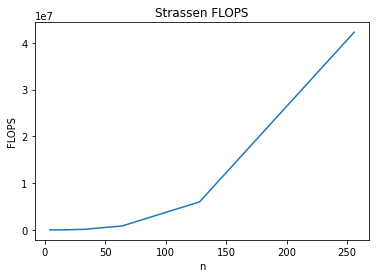

In [12]:
import matplotlib.pyplot as plt

plt.plot(matrix_sizes, operations)
plt.title('Strassen FLOPS')
plt.xlabel('n')
plt.ylabel('FLOPS')
plt.show()

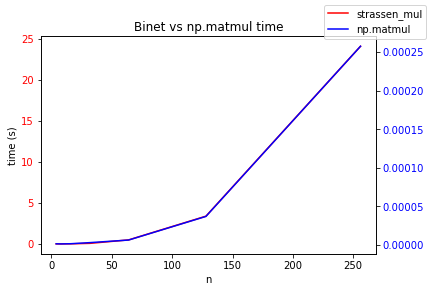

In [13]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('n')
ax1.set_ylabel('time (s)')
ax1.tick_params(axis='y', labelcolor='red')
ax1.plot(matrix_sizes, strassen_times, label='strassen_mul', color='red')

ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor='blue')
ax2.plot(matrix_sizes, np_times, label='np.matmul', color='blue')

fig.legend()
plt.title('Binet vs np.matmul time')
plt.show()

In [14]:
import pandas as pd
df = pd.DataFrame({'n': matrix_sizes, 'time_strassen': strassen_times, 'time_np': np_times, 'flops_strassen': operations})
df.to_csv('strassen.csv', index=False)
df.head()

,n,time_strassen,time_np,flops_strassen
0,4,0.000272,0.000001,265
1,8,0.001864,0.000001,2151
2,16,0.010097,0.000001,16225
3,32,0.068748,0.000003,118215
4,64,0.490011,0.000006,846001
